# Homework 1 (60 pts)

Problems have different cost.

Write your answers in jupyter notebook format using $\LaTeX$ capabilities (or just simple ```tex``` manuscript), or write it down to the paper, scan it and send. A python code should be implemented in jupyter notebook format.

Please, fill in your data.

- **First name**
- **Last name**
- **E-mail**



## Problem 1

Let $\xi$ be some random variable with CDF $F(x)$.
In which cases the random variable
$$
\eta =F(\xi)
$$
has uniform distribution ($\eta\sim \mathcal U(0,1)$)?
Prove your answer.

## Problem 2
Consider the random value $\xi$ which is generated as follows.
Another random variable $\eta$ has discrete distribution


|r.v. $\eta$||1|2|3|
|----|---|----|---|
|probability $p$||0.2|0.3|0.5|

If the random value $\eta$ equals to $1$, value for $\xi$ is sampled uniformly from the interval $(-1,0)$.
If the random value $\eta$ equals to $2$, value for $\xi$ is sampled uniformly from the interval $(1,3)$.
If the random value $\eta$ equals to $3$, value for $\xi$ is taken as $2$ or $4$ with equal probability.

1. Plot the CDF of the random variable $\xi$.

- Write python function to generate samples of $\xi$ using *inverse sampling method*.



## Problem 3

We can use the results of Problem 1 to check the distribution of the samples. Namely, if the set $\{x_1,\,x_2,\,\ldots,\,x_n\}$ is sampled from a general population with CDF $F(x)$, then $F(x_1),\,F(x_2),\,\ldots,\,F(x_n)$ are sampled uniformly and we can check this using empirical histogram.
Consider the example with normal distribution $\mathcal N(1, 3)$

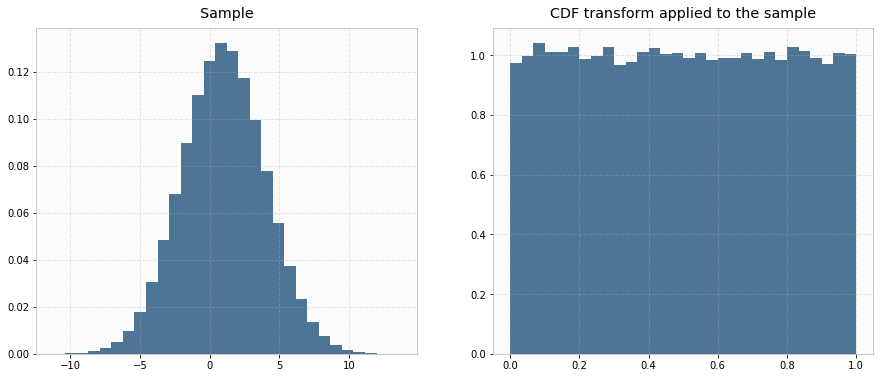

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

samples = norm.rvs(loc=1, scale=3, size=100000)
samples_inv = norm.cdf(samples, loc=1, scale=3)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(samples    , bins=30, density=True);
ax1.set_title('Sample')
ax2.hist(samples_inv, bins=30, density=True);
ax2.set_title('CDF transform applied to the sample');

Now, consider a set of i.i.d. random variables $\{\xi_i\}$, and a random variable $\eta$ which is equal to an average over $M$ variables $\{\xi_i\}$
$$
\eta = \frac1M\sum_{i=1}^M\xi_i.
$$
According to [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem),
the random variable $\eta$ converges in distribution to a normal (recall the conditions of the corresponding statement). 

Make a sample of the variable $\eta$ of a size $10^4$–$10^6$ for  different values of $M$, and show that the distribution of $\eta$ is close to a normal with use of the method described above, for the following random variables $\{\xi_i\}$

1. Bernoulli distribution $\mathbb P(\xi=0)=\frac13$, $\mathbb P(\xi=1)=\frac23$.
- Distribution with CDF $F(x)=\frac12\bigl(1+\text{Erf}(\ln(x))\bigr)$ for $x>0$ and  $F(x)=0$ otherwise, where $\text{Erf}(x):=\frac2{\sqrt\pi}\int_0^x\exp(-\tau^2)\,d\tau$ is the [Error function](https://en.wikipedia.org/wiki/Error_function).
- Distribution with CDF $F(x)=1-\frac1{x^2}$ for $x>1$ and $F(x)=0$ otherwise.

## Problem 4

This problem is a part of *density estimation* problem.
We have a sample with unknown distribution and want to sample more.

There are several ways to solve this problem.
One of the way to sample is to approximate probability distribution by the histogram of the given sample with a fixed number of bins $n$.

The samples for this task are in the file ```hw_01.data.npz```

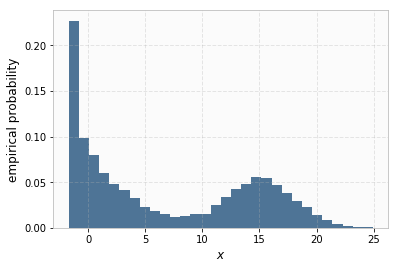

In [2]:
samples = np.load('hw_01.data.npz')['samples']
plt.hist(samples, bins=30, density=True);
plt.xlabel('$x$');
plt.ylabel('empirical probability');

- So, the first task is to write a Python function that sample random variable with the piecewise constant probability density function shown on the plot.
Check the result by building empirical histogram for the sample for a different number of bins $n$.

*Hint: use the Python code from the Lecture 2*

The second way of solving the density estimation problem is to use [empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function) $\hat F$. This function is defined as
$$
\hat F(x):=\frac{\#\{x_i\colon x_i\leq x\}}N
$$
where $\{x_i\}_1^N$ are the sample set, $N$ is the total number of the elements in it.

- Write a python function to sample a random variable which has the CDF $\hat F$ build on the sample from the file ```hw_01.data.npz```. Check the result by building empirical histogram

- Explain the difference between this two ways of density estimation.